In [115]:
# remember to load the environment first by running `conda activate colombia-python2`
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
%matplotlib inline

from matplotlib import font_manager as fm
fm.findfont('Helvetica Neue')

#designate which font to use. To use others just use different ttf files 
#if ttf files not already in there, may need to do fondu conversion of dfont files and move in.
font_path = '/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/HelveticaNeueThin.ttf'
font_properties = fm.FontProperties(fname=font_path)
print font_properties
mpl.rcParams['font.family'] = font_properties.get_name()

#designate some font characteristics
mpl.rcParams['font.weight']=100
mpl.rcParams['axes.labelweight']=100
mpl.rcParams['font.size']=14

:family=Helvetica Neue:style=normal:variant=normal:weight=100:stretch=normal:file=/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/HelveticaNeueThin.ttf:size=10.0


In [120]:
#These lat and longs were looked up online, the cities that samples came from are known from the surveillance data.
city_lat_long_dict = {
    'cali':{'latitude': 3.395397, 'longitude': -76.6657535},
    'monteria':{'latitude': 8.7606317, 'longitude': -75.9169898},
    'ibague':{'latitude': 4.4788663, 'longitude': -75.5238119},
    'belen_de_umbria':{'latitude': 5.2009136, 'longitude': -75.873638},
    'pitalito':{'latitude': 1.8530233, 'longitude': -76.0724286},
                     }

In [122]:
# turn the lats and longs into simple lists for matplotlib plotting
lats = [city_lat_long_dict[key]['latitude'] for key in city_lat_long_dict.keys()]
longs = [city_lat_long_dict[key]['longitude'] for key in city_lat_long_dict.keys()]
print lats
print longs

[3.395397, 1.8530233, 8.7606317, 5.2009136, 4.4788663]
[-76.6657535, -76.0724286, -75.9169898, -75.873638, -75.5238119]


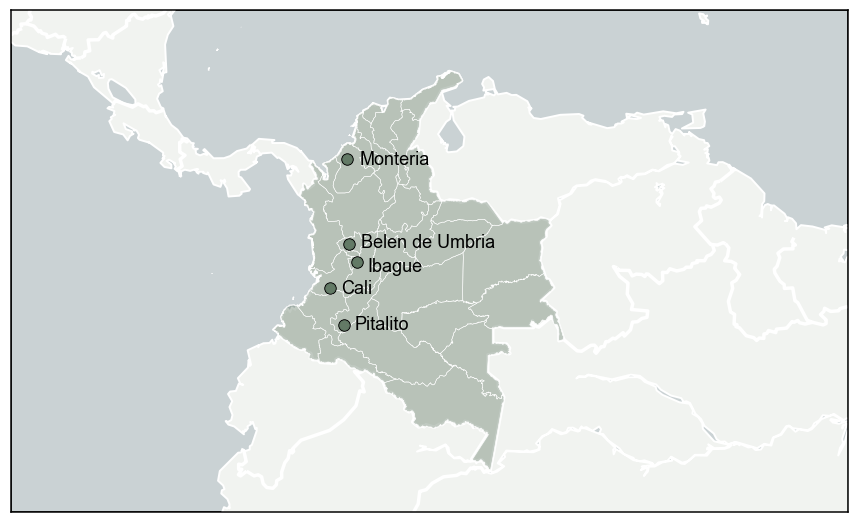

In [126]:
#map plotting time
fig,ax1 = plt.subplots(figsize=(15, 10),facecolor='w')

# bound the portion of the earth that I want to look at with lats and longs for lower left corner and upper right corner
# use low resolution ('l') when scripting so doesn't take a million years to plot. Turn it up higher for manuscript quality fig
# set ax for point scatter.
colombia_map = Basemap(llcrnrlat=-6,urcrnrlat=15,llcrnrlon=-90,urcrnrlon=-55,resolution='l', ax=ax1)
colombia_map.drawmapboundary(fill_color='#CAD2D4', linewidth=1.5) #fill in the ocean, and add box around the map figure
colombia_map.drawcoastlines(color='white', linewidth=2) #draw the coastlines
colombia_map.drawcountries(color='#FFFFFF',linewidth=3.5, linestyle='solid') #draw the country borders
colombia_map.fillcontinents(color ='#F1F3F0') #fill in the landmass color

# make a polygon path for Colombia as a whole so it can be colored differently (0 in shape files references administrative level 0 , or country boundaries)
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_0','country',drawbounds=False)#read in Colombian departmental boundaries from shapefiles
patches = [Polygon(np.array(shape)) for shape in colombia_map.country]  
ax1.add_collection(PatchCollection(patches, facecolor= '#637a66', edgecolor='white', linewidths=1., zorder=2, alpha=0.4))

# add the departmental boundaries, 1 in shapefile references administrative level 1.
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_1','departments',color='#FFFFFF', linewidth=0.5)#read in Colombian departmental boundaries from shapefiles

#add sampling locations to the map given lats and longs of the cities coded above
ax1.scatter(x=longs, y=lats, c='black', alpha=1, zorder=9, marker='o',s=130)
ax1.scatter(x=longs, y=lats, c='#637a66', alpha=1, zorder=10, marker='o',s=90)

### Add CITY LABELING
plt.text(-75.41, 8.74798, 'Monteria', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.35, 5.3,'Belen de Umbria', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.1, 4.3,  'Ibague', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-76.2, 3.35, 'Cali', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')
plt.text(-75.6, 1.85, 'Pitalito', fontsize=18, fontname='Arial',ha='left',va='center',color='black', fontweight='normal')


plt.savefig('../manuscript/figures/genome-locations-figure1.png')
plt.savefig('../manuscript/figures/genome-locations-figure1.pdf')



In [85]:
### Time to plot the epi curve.
from datetime import datetime
epi_daily_data = pd.read_csv("../data/zika-surveillance-data.csv")
epi_daily_data['datetime_date'] =pd.to_datetime(epi_daily_data['date_onset'])

In [88]:

epi_weekly_counts= epi_daily_data.groupby(pd.Grouper(key='datetime_date',freq='W')).count()
epi_weekly_counts.to_csv('../data/weekly_counts.csv')
# just printing out to csv, renaming headers because trying to convert timestamp and index stuff is such a headache
# What I did: rename the date column, and delete the excess columns (counts were the same and recorded in all columns)

In [103]:
good_weekly_counts = pd.read_csv('../data/zika-surveillance-weekly-counts.csv')
#good_weekly_counts

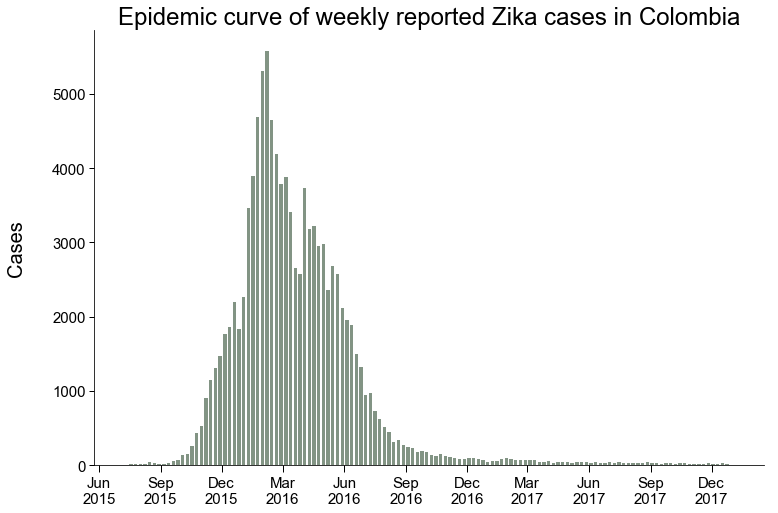

In [122]:
from matplotlib.dates import DateFormatter, DayLocator, YearLocator

fig,ax = plt.subplots(figsize=(12, 8),facecolor='w')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

dates = [datetime.strptime(x,'%Y-%m-%d') for x in good_weekly_counts['start_of_week']]
cases = good_weekly_counts['case_count']
plt.bar(dates, cases, align='center', width = 5, alpha=0.8, color='#637a66')

ax.xaxis_date()
weekFormatter = DateFormatter('%b\n%Y')              
ax.xaxis.set_major_formatter(weekFormatter)

ax.set_ylabel('Cases\n',size=20, fontname='Arial')
ax.set_title('Epidemic curve of weekly reported Zika cases in Colombia', size=24, fontname='Arial')
#ax.set_ylim(0,80)
#ax.set_xlim(-8, 70)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=15, width=1, size=7)
ax.tick_params(axis='y',labelsize=15, width=1, size=5)

for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")

plt.savefig('../manuscript/figures/epi-curve.png')
plt.savefig('../manuscript/figures/epi-curve.pdf')

In [125]:
sampling_dates = ['2016-02-29','2016-03-09','2016-01-29','2016-07-27','2016-05-16','2016-11-02','2016-06-22','2016-08-30']

(735743.09999999998, 736741.90000000002)
(735743.09999999998, 736741.90000000002)


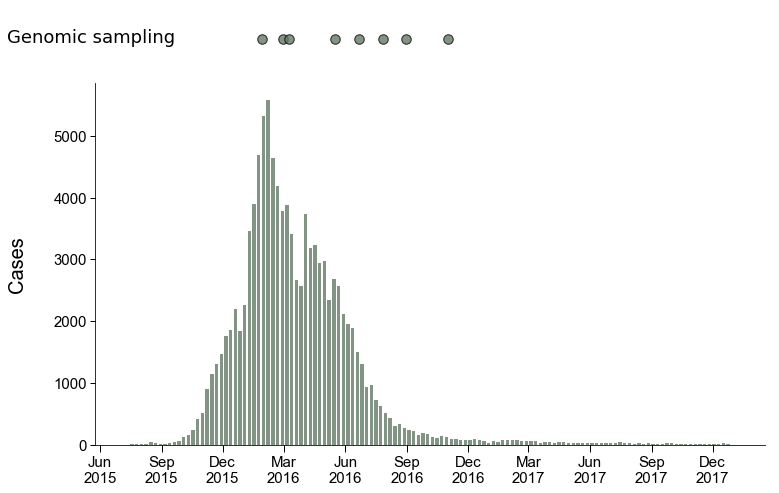

In [147]:
from matplotlib.dates import DateFormatter, DayLocator, YearLocator
from matplotlib import gridspec

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5], wspace=0, hspace=0 )

fig,ax = plt.subplots(figsize=(12, 8),facecolor='w')

ax = plt.subplot(gs[1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

dates = [datetime.strptime(x,'%Y-%m-%d') for x in good_weekly_counts['start_of_week']]
cases = good_weekly_counts['case_count']
plt.bar(dates, cases, align='center', width = 5, alpha=0.8, color='#637a66')

ax.xaxis_date()
weekFormatter = DateFormatter('%b\n%Y')              
ax.xaxis.set_major_formatter(weekFormatter)

ax.set_ylabel('Cases\n',size=20, fontname='Arial')
ax.set_title('Epidemic curve of weekly reported Zika cases in Colombia', size=24, fontname='Arial')
print ax.get_xlim()

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=15, width=1, size=7)
ax.tick_params(axis='y',labelsize=15, width=1, size=5)

for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
    
    
    
### Genome sampling dates

ax2 = plt.subplot(gs[0])

ax2.set_xlim(735743.09999999998, 736741.90000000002)
ax2.xaxis_date()
ax2.set_ylim(0,1)
plottable_dates = [datetime.strptime(x,'%Y-%m-%d') for x in sampling_dates]
for date in plottable_dates:
    ax2.scatter(date,0.6,s=90,facecolor='#637a66', alpha=0.8,edgecolor='black',zorder=99)
#ax2.scatter(date,0.2,s=60,facecolor=color, alpha=0.7,edgecolor='black',zorder=100) ## plot tip circle



#ax2.set_xlim(735743.09999999998, 736741.90000000002)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.set_ylabel('Genomic sampling', rotation = 360, size=18)
ax2.set_xticks([])
ax2.set_yticks([])
print(ax2.get_xlim())

plt.savefig('../manuscript/figures/epi-curve-with-genomic-sampling.png')
plt.savefig('../manuscript/figures/epi-curve-with-genomic-sampling.pdf')